# Análisis de la Producción de Centeno en Argentina (2000-2024)
En este proyecto vamos a analizar la producción del centeno en las diversas provincias de Argentina a partir del dataset publico otorgado por el gobierno ('centeno-serie-1923-2024.csv').  
Este análisis contempla variables como año, provincia, superficie sembrada, superficie cosechada, producción por toneladas y rendimiento de kilos por hectareas.  
El objetivo de este análisis es explorar los rendimientos de las últimas decadas, los outliers y cuál es el aporte de cada provincia.

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [107]:
df_centeno = pd.read_csv(r"/content/centeno-serie-1923-2024.csv",
                low_memory= False,
                encoding="latin1")

print("Info del dataframe:\n")
df_centeno.info()

print("\nCantidad de filas y columnas:")
print(df_centeno.shape)

print("\nDescripcion del dataframe:\n")
df_centeno.describe()

Info del dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14965 entries, 0 to 14964
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cultivo_nombre           14965 non-null  object 
 1   anio                     14965 non-null  int64  
 2   campania                 14965 non-null  object 
 3   provincia_nombre         14965 non-null  object 
 4   provincia_id             14965 non-null  int64  
 5   departamento_nombre      14849 non-null  object 
 6   departamento_id          14826 non-null  float64
 7   superficie_sembrada_ha   14965 non-null  int64  
 8   superficie_cosechada_ha  13176 non-null  float64
 9   produccion_tm            13162 non-null  float64
 10  rendimiento_kgxha        13162 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 1.3+ MB

Cantidad de filas y columnas:
(14965, 11)

Descripcion del dataframe:



,anio,provincia_id,departamento_id,superficie_sembrada_ha,superficie_cosechada_ha,produccion_tm,rendimiento_kgxha
count,14965.000000,14965.000000,14826.000000,14965.000000,13176.000000,13162.000000,13162.000000
mean,1964.080789,32.082459,32093.083435,8177.859739,2501.144277,1930.270802,712.397280
std,25.122854,30.142296,29976.904568,18510.161160,6500.241713,5350.791790,529.804086
min,1923.000000,6.000000,6007.000000,1.000000,0.000000,0.000000,0.000000
25%,1944.000000,6.000000,6532.000000,150.000000,20.000000,15.000000,400.000000
50%,1962.000000,14.000000,14112.000000,1000.000000,300.000000,235.000000,700.000000
75%,1980.000000,62.000000,62007.000000,6000.000000,1700.000000,1400.000000,960.000000
max,2024.000000,94.000000,94015.000000,251138.000000,90000.000000,124068.000000,10555.000000


In [108]:
df_centeno.isnull().sum() #Cuenta cuántos datos vacíos hay

,0
cultivo_nombre,0
anio,0
campania,0
provincia_nombre,0
provincia_id,0
departamento_nombre,116
departamento_id,139
superficie_sembrada_ha,0
superficie_cosechada_ha,1789
produccion_tm,1803


In [109]:
#Eliminamos la columna de ids de departamentos ya que no nos es revelante

df = df_centeno.drop(columns=["departamento_id"])

#Rellenamos los departamentos sin nombre para poder trabajarlos igual

df["departamento_nombre"] = df["departamento_nombre"].fillna("Desconocido")
df.isnull().sum()

,0
cultivo_nombre,0
anio,0
campania,0
provincia_nombre,0
provincia_id,0
departamento_nombre,0
superficie_sembrada_ha,0
superficie_cosechada_ha,1789
produccion_tm,1803
rendimiento_kgxha,1803


## Observación ante datos faltantes
Tras analizar la cantidad de datos faltantes en el dataset, se observa que las columnas más incompletas corresponden a la cosecha, la producción y el rendimiento.  
A continuación, identificaremos como se distribuyen estos datos y cuales son las provincias con mayor cosecha promedio.


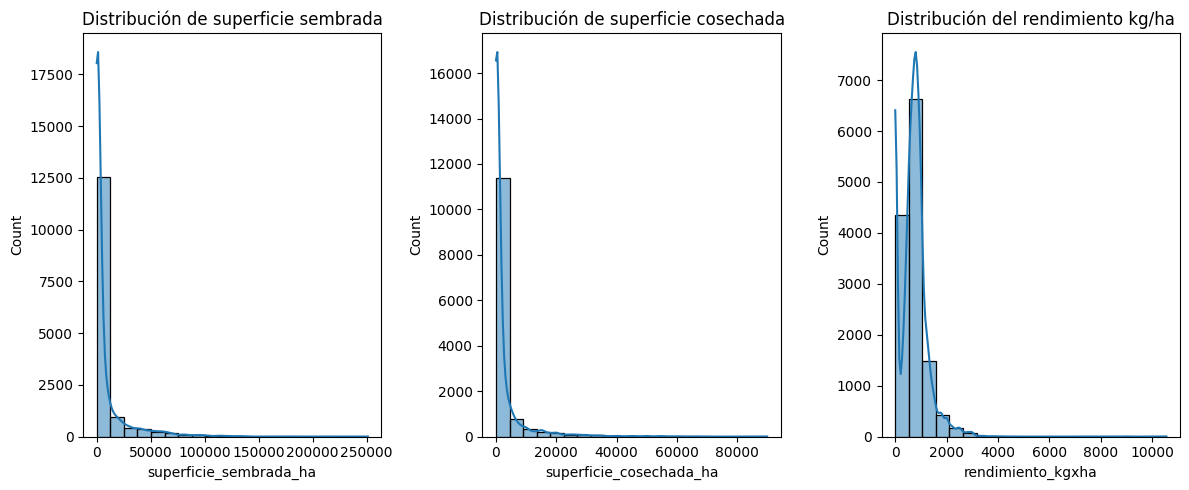

In [110]:

plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1) # Crea el primer subgráfico en una cuadrícula de 1 fila y 3 columnas
sns.histplot(df['superficie_sembrada_ha'],bins=20, kde=True)
plt.title('Distribución de superficie sembrada') # Establece el título del primer subgráfico

plt.subplot(1, 3, 2) # Crea el segundo subgráfico
sns.histplot(df['superficie_cosechada_ha'],bins=20, kde=True)
plt.title('Distribución de superficie cosechada') # Establece el título del segundo subgráfico

plt.subplot(1, 3, 3) # Crea el tercer subgráfico
sns.histplot(df['rendimiento_kgxha'],bins=20, kde=True)
plt.title('Distribución del rendimiento kg/ha') # Establece el título del tercer subgráfico

plt.tight_layout() # Ajusta automáticamente los parámetros del subgráfico para que encajen en el área de la figura
plt.show()

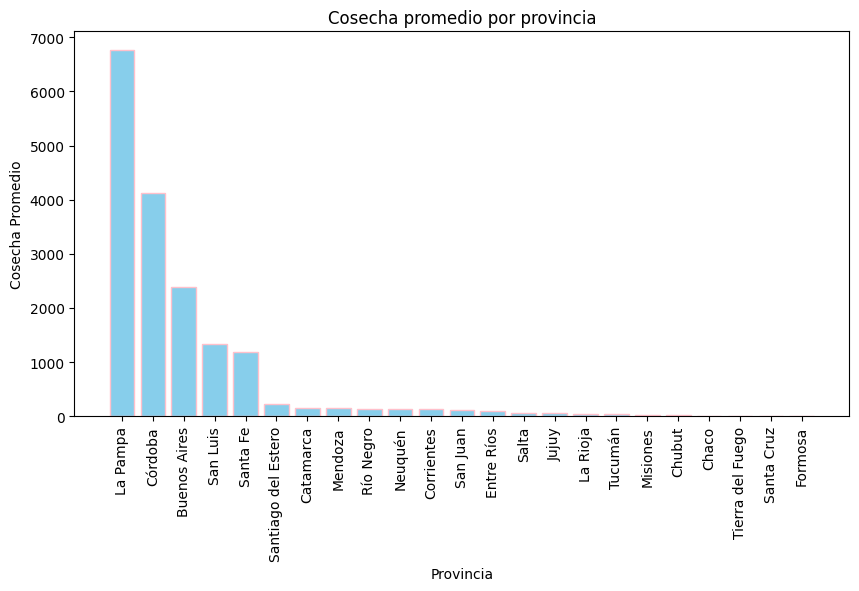

Podemos destacar que las provincias con más cosecha son: 
La Pampa, Córdoba, Buenos Aires, San Luis, Santa Fe, Santiago del Estero


In [111]:
#Filtrado y promedio de cosecha

cosecha_promedio = df.groupby("provincia_nombre")["superficie_cosechada_ha"].mean().sort_values(ascending=False)


#Usamos los atributos .index y .values para armar los ejes, ya que es una serie
plt.figure(figsize=(10,5))
plt.bar(cosecha_promedio.index, cosecha_promedio.values, color="skyblue", edgecolor="pink")
plt.xticks(rotation=90)
plt.title("Cosecha promedio por provincia")
plt.xlabel("Provincia")
plt.ylabel("Cosecha Promedio")
plt.show()


top6 = cosecha_promedio.head(6)

print("Podemos destacar que las provincias con más cosecha son: ")
#Únimos el top 6 de provincias(índice)
print(", ".join(top6.index))

## La Pampa
A continuación analizaremos la tendencia de cosecha de La Pampa y su coeficiente de variabilidad, debido a que es la provincia con mayor cosecha promedio.   
Posteriormente, evaluaremos la evolución de su cosecha y la superficie sembrada desde el año 2000.  
Por ultimo se calculará la mediana de la superficie cosechada, lo que nos responderá si es la Pampa una gran causadora de outliers?

Alta variabilidad relativa, dando un 120%
➡ Esto indica que los volúmenes de cosecha varían demasiado entre años.


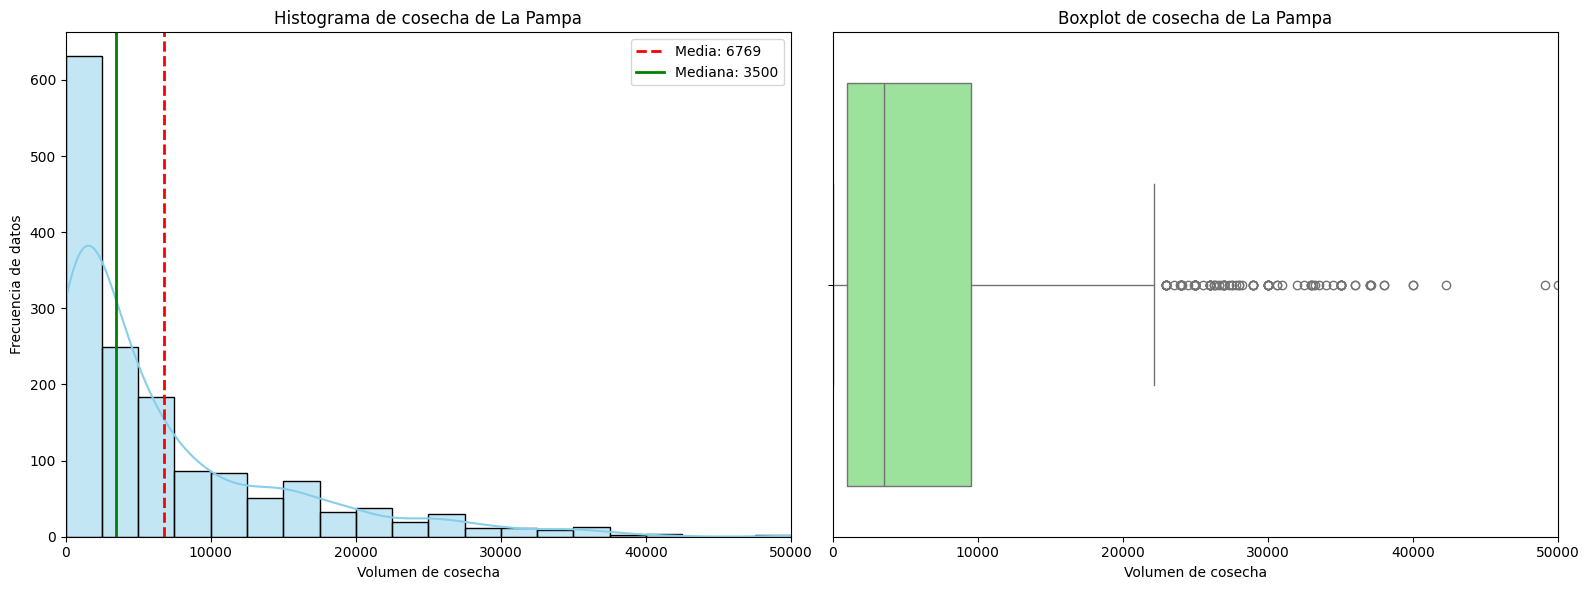

In [112]:
#Filtrado
provincia_top = ["La Pampa"]
df_top = df[df["provincia_nombre"].isin(provincia_top)]

#Media y mediana
df_top_media = df_top['superficie_cosechada_ha'].mean()
df_top_mediana = df_top['superficie_cosechada_ha'].median()

#Coeficiente de variabilidad
cv_cosecha = df_top['superficie_cosechada_ha'].std() / df_top['superficie_cosechada_ha'].mean()
cv_percent = round(cv_cosecha * 100)

if cv_percent < 10:
    print(f"Baja variabilidad relativa, dando un {cv_percent}%")
elif cv_percent < 20:
    print(f"Variabilidad moderada, dando un {cv_percent}%")
else:
    print(f"Alta variabilidad relativa, dando un {cv_percent}%")
    print("➡ Esto indica que los volúmenes de cosecha varían demasiado entre años.")

#Establecer rango para que ambos gráficos tengan el mismo eje
rango = (df_top["superficie_cosechada_ha"].min(), df_top["superficie_cosechada_ha"].max())

fig, axes = plt.subplots(1, 2, figsize=(16,6))

#Histograma

sns.histplot(df_top["superficie_cosechada_ha"],bins=20,kde=True,color="skyblue",edgecolor="black",ax=axes[0])

#Media y Mediana
axes[0].axvline(df_top_media, color='red', linestyle='--', linewidth=2, label=f'Media: {df_top_media:.0f}')
axes[0].axvline(df_top_mediana, color='green', linestyle='-', linewidth=2, label=f'Mediana: {df_top_mediana:.0f}')

#Configuración del histograma
axes[0].set_title("Histograma de cosecha de La Pampa")
axes[0].set_xlabel("Volumen de cosecha")
axes[0].set_ylabel("Frecuencia de datos")
axes[0].set_xlim(rango)
axes[0].legend()

#Boxplot

sns.boxplot(x=df_top["superficie_cosechada_ha"], color="lightgreen", ax=axes[1])
axes[1].set_title("Boxplot de cosecha de La Pampa")
axes[1].set_xlabel("Volumen de cosecha")
axes[1].set_xlim(rango)

plt.tight_layout()
plt.show()



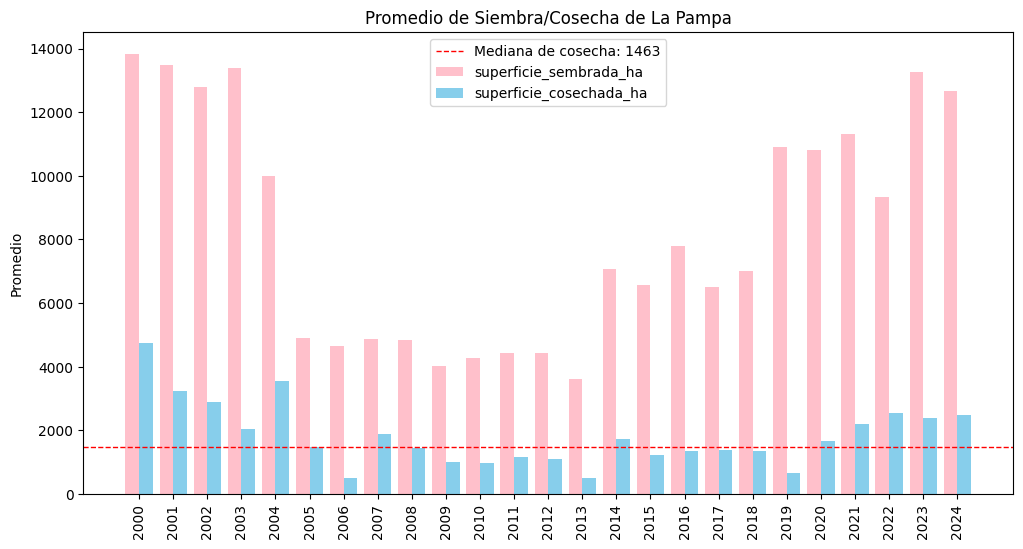

En los años recientes, la cosecha promedio en La Pampa no se mantiene en 7000 hectáreas históricas, situándose actualmente en aproximadamente 1463 hectáreas.


In [113]:
#Filtrando a partir del año 2000
df_top = df_top[df_top["anio"] >= 2000]
cosecha_promedio_pampa = df_top.groupby("anio")[["superficie_sembrada_ha","superficie_cosechada_ha"]].mean()

mediana_cosecha = cosecha_promedio_pampa['superficie_cosechada_ha'].quantile(0.5)

x = range(len(cosecha_promedio_pampa.index))
bar_width = 0.4

plt.figure(figsize=(12,6))

plt.bar([i - bar_width/2 for i in x], cosecha_promedio_pampa["superficie_sembrada_ha"], width=bar_width, label="superficie_sembrada_ha", color="pink")
plt.bar([i + bar_width/2 for i in x], cosecha_promedio_pampa["superficie_cosechada_ha"], width=bar_width, label="superficie_cosechada_ha", color="skyblue")

plt.axhline(mediana_cosecha, color='red', linestyle='--', linewidth=1, label=f'Mediana de cosecha: {mediana_cosecha:.0f}')

plt.title("Promedio de Siembra/Cosecha de La Pampa")
plt.ylabel("Promedio")
plt.xticks(x, cosecha_promedio_pampa.index, rotation=90)
plt.legend()
plt.show()
print(f"En los años recientes, la cosecha promedio en La Pampa no se mantiene en 7000 hectáreas históricas, situándose actualmente en aproximadamente {round(mediana_cosecha)} hectáreas.")

## Análisis de los Datos Iniciales y los outlliers

Basado en las visualizaciones y estadísticas iniciales:

*   **Distribución de Variables:** Los histogramas de `superficie_sembrada_ha`, `superficie_cosechada_ha` y `rendimiento_kgxha` muestran distribuciones asimétricas hacia la derecha, indicando la presencia de valores atípicos (outliers) elevados. La mediana es un mejor indicador de la tendencia central que la media para estas variables.

*   **La provincia con mayor cosecha promedio es por lejos La Pampa**
*   **Análisis Detallado de La Pampa:**
    *   El coeficiente de variabilidad para la cosecha en La Pampa es alto (120%), lo que confirma que los volúmenes de cosecha en esta provincia varían considerablemente de un año a otro.
    *   El histograma y el boxplot de la cosecha en La Pampa reafirman la presencia de outliers extremos, es decir, años con cosechas excepcionalmente altas en comparación con la mayoría de los registros.
    *   Al analizar la evolución de la siembra y cosecha en La Pampa desde el año 2000, se observa que la cosecha promedio reciente (aproximadamente 1463 hectáreas) es considerablemente menor que la media histórica (aproximadamente 7000 hectáreas).


*superficie sembrada*
Media: 8177.86
Mediana: 1000.00
Moda: 100.00
Percentil 90: 25000.00

*superficie cosechada*
Media: 2501.14
Mediana: 300.00
Moda: 0.00
Percentil 90: 6400.00

*rendimiento KgxHa*
Media: 712.40
Mediana: 700.00
Moda: 0.00
Percentil 90: 1300.00



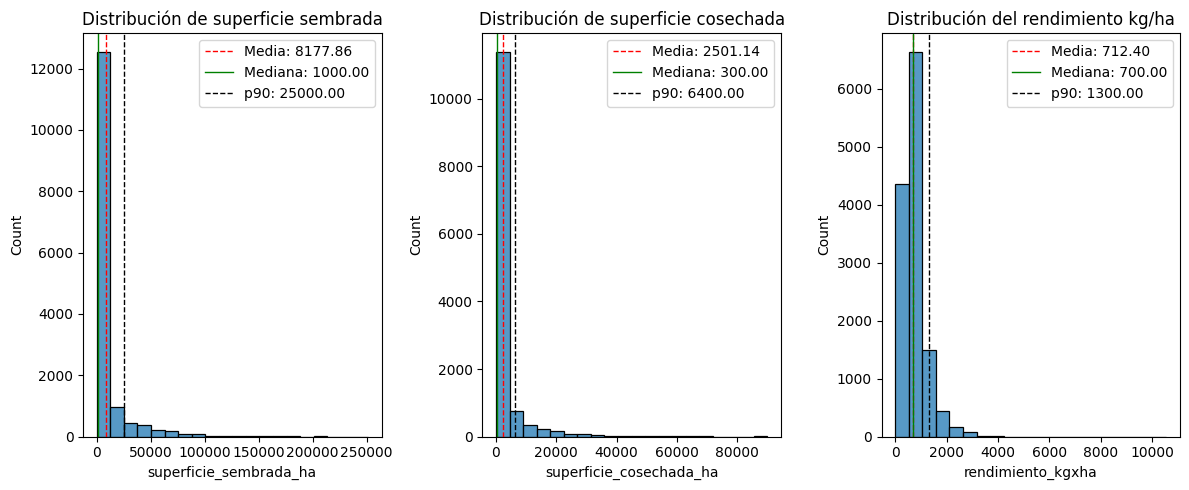

In [114]:
#Calculando media, mediana, moda y percentil de cada variable

mediana = [df["superficie_sembrada_ha"].median(),df["superficie_cosechada_ha"].median(),df["rendimiento_kgxha"].median()]

media = [df["superficie_sembrada_ha"].mean(),df["superficie_cosechada_ha"].mean(),df["rendimiento_kgxha"].mean()]

moda = [df["superficie_sembrada_ha"].mode(),df["superficie_cosechada_ha"].mode(),df["rendimiento_kgxha"].mode()]

percentil90 = [df["superficie_sembrada_ha"].quantile(0.9),df["superficie_cosechada_ha"].quantile(0.9),df["rendimiento_kgxha"].quantile(0.9)]

valores = ["superficie sembrada", "superficie cosechada", "rendimiento KgxHa"]


for m, med, mo, per, valor in zip(media, mediana, moda, percentil90, valores):
   print(f"*{valor}*\nMedia: {m:.2f}\nMediana: {med:.2f}\nModa: {mo[0]:.2f}\nPercentil 90: {per:.2f}\n")

plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['superficie_sembrada_ha'],bins=20)
plt.axvline(media[0], color='red', linestyle='--', linewidth=1, label=f'Media: {media[0]:.2f}')
plt.axvline(mediana[0], color='green', linestyle='-', linewidth=1, label=f'Mediana: {mediana[0]:.2f}')
plt.axvline(percentil90[0], color='black', linestyle='--', linewidth=1, label=f'p90: {percentil90[0]:.2f}')
plt.title('Distribución de superficie sembrada')
plt.legend()

plt.subplot(1, 3, 2)
sns.histplot(df['superficie_cosechada_ha'],bins=20)
plt.axvline(media[1], color='red', linestyle='--', linewidth=1, label=f'Media: {media[1]:.2f}')
plt.axvline(mediana[1], color='green', linestyle='-', linewidth=1, label=f'Mediana: {mediana[1]:.2f}')
plt.axvline(percentil90[1], color='black', linestyle='--', linewidth=1, label=f'p90: {percentil90[1]:.2f}')
plt.title('Distribución de superficie cosechada')
plt.legend()

plt.subplot(1, 3, 3)
sns.histplot(df['rendimiento_kgxha'],bins=20)
plt.axvline(media[2], color='red', linestyle='--', linewidth=1, label=f'Media: {media[2]:.2f}')
plt.axvline(mediana[2], color='green', linestyle='-', linewidth=1, label=f'Mediana: {mediana[2]:.2f}')
plt.axvline(percentil90[2], color='black', linestyle='--', linewidth=1, label=f'p90: {percentil90[2]:.2f}')
plt.title('Distribución del rendimiento kg/ha')
plt.legend()

plt.tight_layout()
plt.show()

## Provincias con más datos faltantes

A continuación, analizamos la cantidad de datos faltantes en las columnas de interés: superficie cosechada, producción y rendimiento.  
Esto nos permitirá identificar qué provincias presentan mayor falta de información en estas variables clave.

In [115]:
# Contar nulos por provincia en las columnas de interés
faltantes = df.groupby("provincia_nombre")[["superficie_cosechada_ha","produccion_tm","rendimiento_kgxha"]].apply(lambda x: x.isna().sum())

#Crear nueva columna, la cual contiene la suma de los nulos
faltantes["total_faltantes"] = faltantes.sum(axis=1) #axis=1 suma las filas

# Ordenar de mayor a menor
faltantes = faltantes.sort_values("total_faltantes", ascending=False)

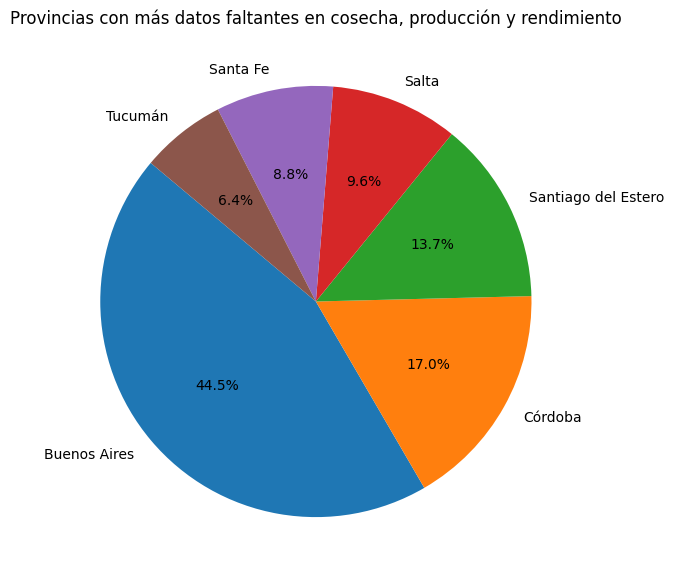

In [116]:
#Gráfico de torta

plt.figure(figsize=(7,7))
plt.pie(faltantes["total_faltantes"].values[:6],
        labels=faltantes["total_faltantes"].index[:6],
        autopct="%1.1f%%",
        startangle=140)
plt.title("Provincias con más datos faltantes en cosecha, producción y rendimiento")
plt.show()

## 1. Impacto de los datos faltantes en el rendimiento

Como vimos, las provincias con mayor cantidad de datos faltantes son Buenos Aires, Córdoba y Santiago del Estero.  
Lo que nos lleva a la primer hipótesis.  
**La falta de datos produce un cambio significativo en los rendimientos de estas provincias.**

In [117]:
# Provincias a analizar
provincias_top = ["Buenos Aires", "Córdoba", "Santiago del Estero"]
df_top = df[df["provincia_nombre"].isin(provincias_top)]

# Calcular promedio de rendimiento (kg/ha) ignorando valores nulos
promedio_ignorando = df_top.groupby("provincia_nombre")["rendimiento_kgxha"].mean()

# Calcular promedio de rendimiento (kg/ha) atribuyéndole valor "0" a los valores nulos
promedio_cero = df_top.groupby("provincia_nombre")["rendimiento_kgxha"].apply(lambda x: x.fillna(0).mean())

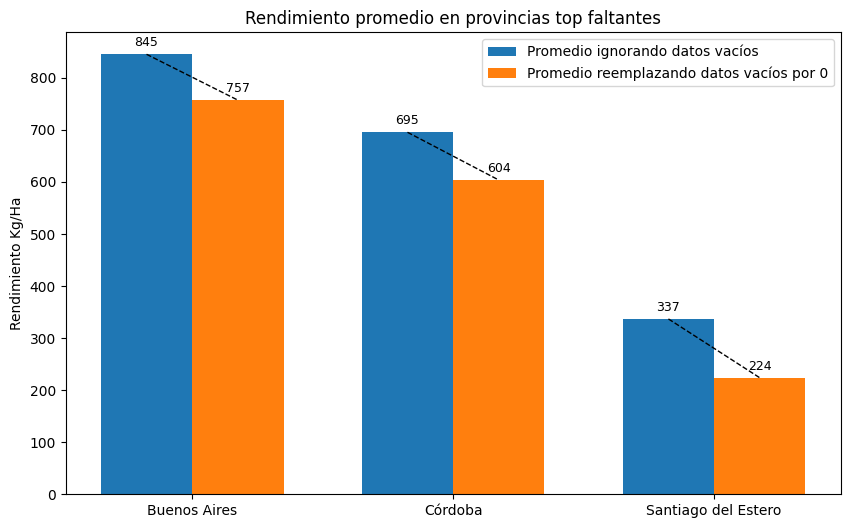

La variabilidad ignorando datos y reemplazando por 0 en Buenos Aires es: 10.42%
La variabilidad ignorando datos y reemplazando por 0 en Córdoba es: 13.19%
La variabilidad ignorando datos y reemplazando por 0 en Santiago del Estero es: 33.56%


In [118]:
# Preparar datos para el gráfico

x = np.arange(len(provincias_top))  # posiciones en el eje x
width = 0.35  # ancho de las barras

plt.figure(figsize=(10,6))

bars1 = plt.bar(x - width/2, promedio_ignorando.values, width, label='Promedio ignorando datos vacíos')
bars2 =plt.bar(x + width/2, promedio_cero.values, width, label='Promedio reemplazando datos vacíos por 0')

# Conectar cada par de barras con una línea para mostrar la caída
for i in range(len(x)):
    plt.plot([x[i] - width/2, x[i] + width/2],
             [promedio_ignorando.values[i], promedio_cero.values[i]],
             color='black', linestyle='--', linewidth=1)

# Agregar etiquetas numéricas arriba de cada barra
for bar in bars1 + bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 10,   # posición
             f'{height:.0f}', ha='center', va='bottom', fontsize=9)

plt.xticks(x, provincias_top)
plt.ylabel("Rendimiento Kg/Ha")
plt.title("Rendimiento promedio en provincias top faltantes")
plt.legend()
plt.show()

# Calcular variabilidad para cada provincia
variabilidad = (promedio_ignorando - promedio_cero) / promedio_ignorando * 100

# Mostrar resultados
for provincia, var in variabilidad.items():
    print(f"La variabilidad ignorando datos y reemplazando por 0 en {provincia} es: {var:.2f}%")


#2. Variabilidad del rendimiento y eficiencia según el manejo de datos faltantes

Dado el impacto notable de los datos faltantes, se hace necesario profundizar el análisis enfocándonos en períodos específicos: la década del 2000, la del 2010 y los últimos años. Este enfoque permitirá responder mejor la siguiente afirmación respecto a las últimas décadas.  
**Se espera que la eficiencia de las provincias, medida como la relación entre lo que siembran y lo que cosechan, se vea afectada por el manejo de los datos faltantes**

In [119]:

#Funcion para recibir DataFrame con los datos que contenga y plasmarlos en un gráfico
def resumen_por_decada(df_entrada, titulo="", ax= None):

    decadas_labels = ["2000-2010", "2010-2020", "2020-2024"]

    resumen = df_entrada.groupby(   #divide los años en tres períodos (2000-2010, 2010-2020 y 2020-2024) y luego saca el promedio
        pd.cut(df_entrada["anio"], bins=[2000,2010,2020,2024], labels=decadas_labels, include_lowest=True),
        observed=True
    )[["superficie_sembrada_ha","superficie_cosechada_ha","produccion_tm","rendimiento_kgxha"]].mean()

    #Pasamos a formato largo
    resumen_melt = resumen.reset_index().melt(id_vars="anio", var_name="Variable", value_name="Promedio")

    #Gráfico
    sns.barplot(data=resumen_melt, x="anio", y="Promedio", hue="Variable", ax=ax)
    ax.set_title(f"Rendimiento por década {titulo}", fontsize=14, weight="bold")
    ax.set_xlabel("Década")
    ax.set_ylabel("Promedio")
    ax.grid(True)
    ax.legend(title="Variable")

    # Totales y eficiencia
    totales_decada = df_entrada.groupby(
        pd.cut(df_entrada["anio"], bins=[2000,2010,2020,2024], labels=decadas_labels),
        observed=True
    )[["superficie_sembrada_ha","superficie_cosechada_ha"]].sum()

    #Sacamos porcentaje
    totales_decada["eficiencia"] = totales_decada["superficie_cosechada_ha"] / totales_decada["superficie_sembrada_ha"] * 100

    for decada, porcentaje in totales_decada.iterrows():
        print(f"Eficiencia promedio {titulo} en {decada}: {porcentaje['eficiencia']:.2f}%")

    return resumen, totales_decada

Eficiencia promedio (con datos faltantes en 0) en 2000-2010: 15.51%
Eficiencia promedio (con datos faltantes en 0) en 2010-2020: 13.52%
Eficiencia promedio (con datos faltantes en 0) en 2020-2024: 12.56%
------------------------------------------------------------------
Eficiencia promedio (quitando datos faltantes) en 2000-2010: 21.13%
Eficiencia promedio (quitando datos faltantes) en 2010-2020: 14.55%
Eficiencia promedio (quitando datos faltantes) en 2020-2024: 13.99%


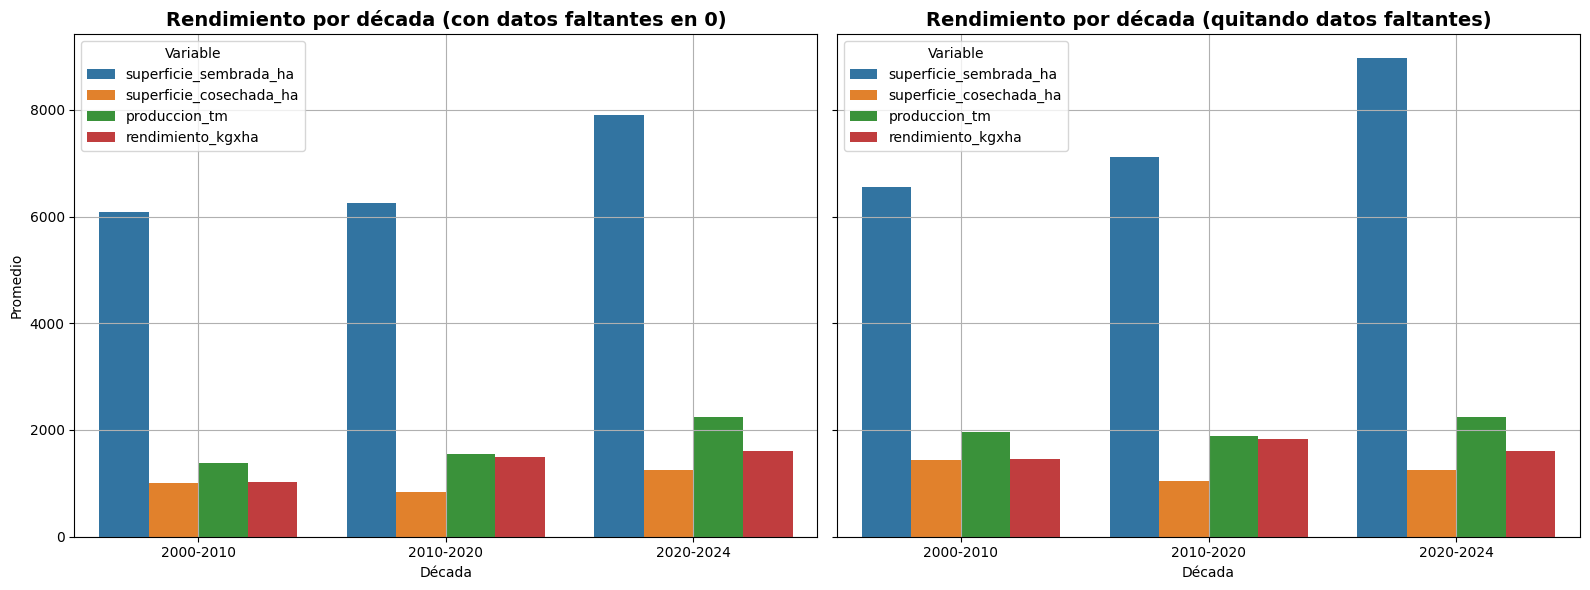

Cantidad de datos antes:  (14965, 10)
Cantidad de datos espués:  (10784, 10)


In [120]:
#Limpiando dataframe

df_limpio = df[
    (df["superficie_cosechada_ha"].notna()) &
    (df["superficie_sembrada_ha"].notna()) &
    (df["superficie_sembrada_ha"] > 0) &
    (df["superficie_cosechada_ha"] > 0)
]

fig, axes = plt.subplots(1, 2, figsize=(16,6), sharey=True) #sharey para que compartan eje Y

resumen, totales = resumen_por_decada(df, "(con datos faltantes en 0)", ax=axes[0])
print("------------------------------------------------------------------")
resumen_limpio, totales_limpio = resumen_por_decada(df_limpio, "(quitando datos faltantes)", ax=axes[1])

plt.tight_layout()
plt.show()
print("Cantidad de datos antes: ", df.shape)
print("Cantidad de datos espués: ", df_limpio.shape)

# 3. Eficiencia por década y desempeño provincial
El análisis por década muestra que la eficiencia aumenta al corregir los datos faltantes, especialmente entre 2000 y 2010, pero presenta una tendencia descendente en los años más recientes.
Esto plantea la posibilidad de que la última década se caracterice por una mayor dispersión entre provincias, donde algunas mantienen niveles altos de eficiencia mientras que otras presentan caídas en su rendimiento relativo.

In [121]:
#Filtrado por década
df_2010_2020 = df_limpio[(df_limpio["anio"] >= 2010) & (df_limpio["anio"] < 2020)]

# Totales y eficiencia por provincia
ef_prov = df_2010_2020.groupby("provincia_nombre")[["superficie_sembrada_ha","superficie_cosechada_ha"]].sum()
ef_prov["eficiencia"] = ef_prov["superficie_cosechada_ha"] / ef_prov["superficie_sembrada_ha"] * 100

# Ordenar por eficiencia
ef_prov = ef_prov.sort_values("eficiencia", ascending=False)

# Promedio de rendimiento por provincia
rendimiento_promedio = df_2010_2020.groupby("provincia_nombre")["rendimiento_kgxha"].mean()

# alinear índices
rendimiento_promedio = rendimiento_promedio[ef_prov.index]

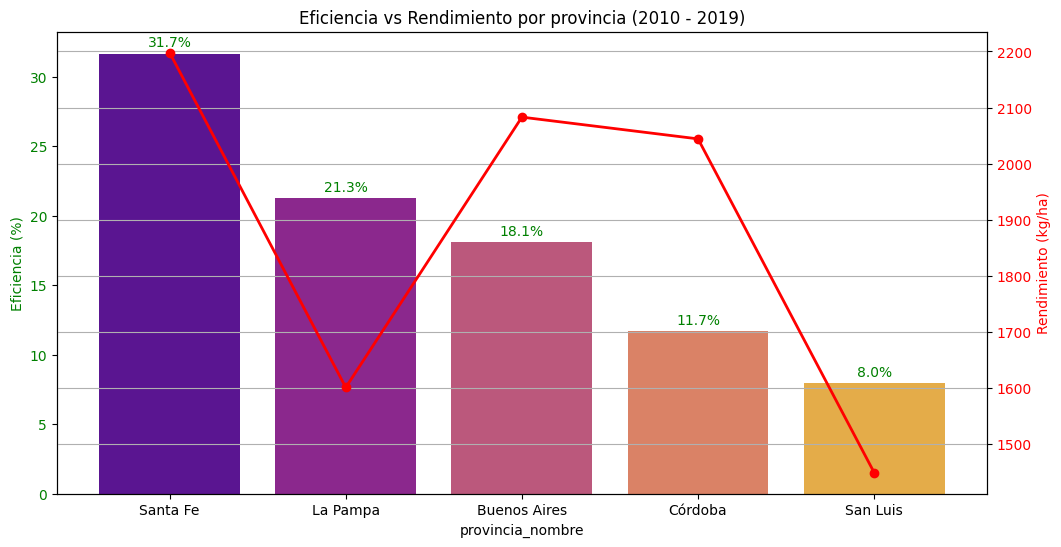

* Santa Fe: lider absoluto en ambos indicadores.

* La Pampa: buena eficiencia, pero rendimiento por hectárea más bajo.

* Buenos Aires y Córdoba: buen rendimiento por hectárea, pero baja eficiencia → podría mejorar el manejo de superficie sembrada vs cosechada.

* San Luis: problemas tanto de eficiencia como de rendimiento → menos productiva y menos efectiva.


In [122]:
# Gráfico combinado
fig, ax1 = plt.subplots(figsize=(12,6))

# Barras: eficiencia
bars = sns.barplot(x=ef_prov.index, y=ef_prov["eficiencia"], palette="plasma", hue= ef_prov.index, legend=False, ax=ax1)
ax1.set_ylabel("Eficiencia (%)", color="green")
ax1.tick_params(axis='y', labelcolor="green")

# Establecer ticks y labels correctamente
ax1.set_xticks(range(len(ef_prov.index)))
ax1.set_xticklabels(ef_prov.index)

# Agregar etiquetas sobre las barras
for bar in bars.patches:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.1f}%', ha='center', color='green', fontsize=10)

# Línea: rendimiento kg/ha
ax2 = ax1.twinx()
line = ax2.plot(ef_prov.index, rendimiento_promedio, color="red", marker="o", linewidth=2)
ax2.set_ylabel("Rendimiento (kg/ha)", color="red")
ax2.tick_params(axis='y', labelcolor="red")


plt.title("Eficiencia vs Rendimiento por provincia (2010 - 2019)")
plt.grid(True)
plt.show()
print("""* Santa Fe: lider absoluto en ambos indicadores.

* La Pampa: buena eficiencia, pero rendimiento por hectárea más bajo.

* Buenos Aires y Córdoba: buen rendimiento por hectárea, pero baja eficiencia → podría mejorar el manejo de superficie sembrada vs cosechada.

* San Luis: problemas tanto de eficiencia como de rendimiento → menos productiva y menos efectiva.""")

## 4. Evolución de la productividad por provincia (2010-2019)

Se plantea que, durante la década del 2010, las provincias presentaron trayectorias productivas heterogéneas, reflejadas en variaciones de la superficie sembrada, la cosecha y el rendimiento promedio anual. Este análisis busca identificar cuáles provincias lograron sostener su productividad y cuáles evidenciaron mayores fluctuaciones.



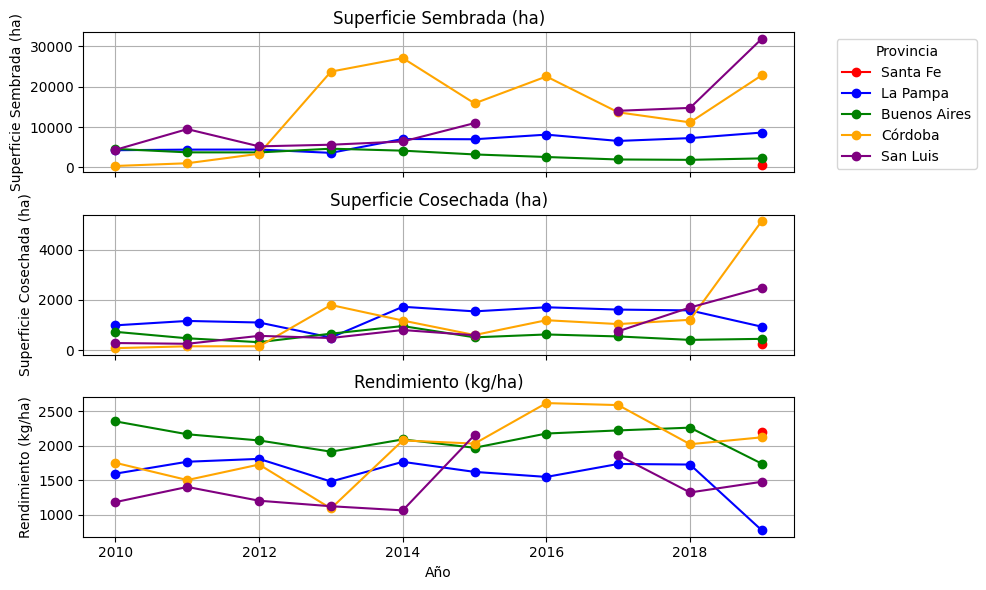

In [123]:
provincias_top = ["Santa Fe", "La Pampa", "Buenos Aires", "Córdoba", "San Luis"]
colores = ["red", "blue", "green", "orange", "purple"]

# Filtrar los datos para las provincias top
df_2010 = df_2010_2020[df_2010_2020["provincia_nombre"].isin(provincias_top)].copy()

# Calcular el promedio anual por provincia y variable
df_anual_provincia = df_2010.groupby(["anio", "provincia_nombre"])[["superficie_sembrada_ha", "superficie_cosechada_ha", "rendimiento_kgxha"]].mean().unstack()


fig, axes = plt.subplots(3, 1, figsize=(10, 6), sharex=True)

variables = ["superficie_sembrada_ha", "superficie_cosechada_ha", "rendimiento_kgxha"]
titulos = ["Superficie Sembrada (ha)", "Superficie Cosechada (ha)", "Rendimiento (kg/ha)"]
y_labels = ["Superficie Sembrada (ha)", "Superficie Cosechada (ha)", "Rendimiento (kg/ha)"]

for i, var in enumerate(variables):
    ax = axes[i]
    for j, provincia in enumerate(provincias_top):
        ax.plot(df_anual_provincia.index, df_anual_provincia[(var, provincia)], marker='o', linestyle='-', color=colores[j], label=provincia)

    ax.set_title(titulos[i])
    ax.set_ylabel(y_labels[i])
    ax.grid(True)
    if i == 0:
        ax.legend(title="Provincia", bbox_to_anchor=(1.05, 1), loc='upper left')

axes[-1].set_xlabel("Año")

plt.tight_layout()
plt.show()

Se puede apreciar que provincias como **Santa Fe**, aporta datos unicamente en el 2019, desmintiendo que es el lider de la década.    
**La Pampa y Buenos Aires** muestran mayor estabilidad en sus rendimientos, aunque presentan caidas temporales al final de la decada.   
**Cordoba** evidencia altos picos de rendimiento a pesar de tener cosechas relativamente bajas, reflejando alta variabilidad interanual.    
**San Luis**, pese a ser la segunda provincia con mayor superficie sembrada, tiene produccion mas baja y rendimientos con altibajos, incluso con ausencia en el 2016

## 5. Evolución reciente de la producción de centeno (2021–2024)

Durante los últimos cuatro años, la producción de centeno y su eficiencia promedio anual han presentado fluctuaciones leves, reflejando variaciones interanuales en la productividad general. Este análisis permitirá evaluar si la eficiencia mantiene estabilidad, evidencia una ligera recuperación o muestra tendencias descendentes respecto de los años previos.

Eficiencia promedio en el año 2021: 14.02%
Eficiencia promedio en el año 2022: 13.04%
Eficiencia promedio en el año 2023: 13.83%
Eficiencia promedio en el año 2024: 15.05%


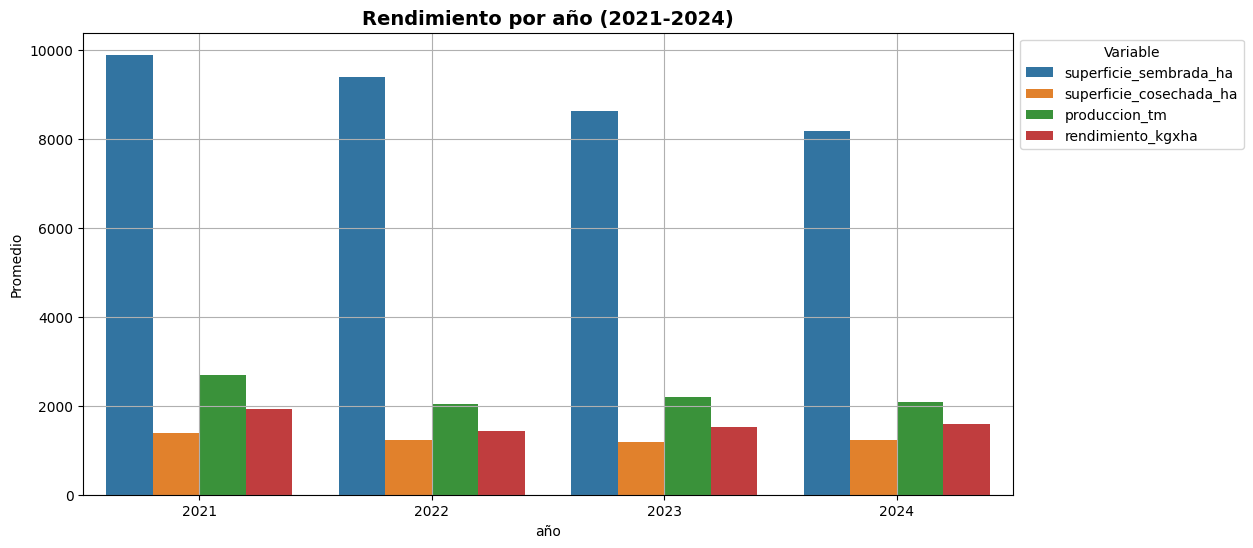

In [124]:
df_actualidad = df_limpio[(df_limpio["anio"] >= 2021) & (df_limpio["anio"] <= 2024)]

resumen = df_actualidad.groupby("anio")[["superficie_sembrada_ha",
                                         "superficie_cosechada_ha",
                                         "produccion_tm",
                                         "rendimiento_kgxha"]].mean()

#Pasamos a formato largo
resumen_melt = resumen.reset_index().melt(id_vars="anio", var_name="Variable", value_name="Promedio")

plt.figure(figsize=(12,6))
sns.barplot(data=resumen_melt, x="anio", y="Promedio", hue="Variable")
plt.title("Rendimiento por año (2021-2024)", fontsize=14, weight="bold")
plt.xlabel("año")
plt.ylabel("Promedio")
plt.grid(True)
plt.legend(title="Variable",  bbox_to_anchor=(1, 1),loc="upper left")

resumen["eficiencia"] = resumen["superficie_cosechada_ha"] / resumen["superficie_sembrada_ha"] * 100

for año, porcentaje in resumen.iterrows():
        print(f"Eficiencia promedio en el año {año}: {porcentaje['eficiencia']:.2f}%")




# Resumen de Hallazgos

- **Distribución y outliers**: Variables asimétricas con valores atípicos → la mediana es más representativa que la media.  
- **Cosecha por provincia**: La Pampa lidera en cosecha promedio, pero con alta variabilidad interanual (CV ≈ 120%).  
- **Datos faltantes**: Buenos Aires, Córdoba y Santiago del Estero concentran la mayoría de los nulos. Imputar con cero distorsiona los rendimientos (ej: Santiago del Estero, variabilidad > 30%).  
- **Eficiencia por década**: Leve caída en 2010-2020 y 2020-2024 frente a lo que fue 2000-2010.  
- **Comparación provincial (2010-2019)**:  
  - Santa Fe → alta eficiencia y rendimiento (con pocos años de datos).  
  - La Pampa → buena eficiencia, bajo rendimiento relativo.  
  - Buenos Aires y Córdoba → buen rendimiento pero baja eficiencia.  
  - San Luis → rezagada en ambos indicadores.  
- **Evolución reciente (2021-2024)**: ligera recuperación en eficiencia, con diferencias marcadas por provincia.  

---

# Limitaciones

- **Faltantes** en cosecha, producción y rendimiento afectan la precisión.  
- **Datos agregados** a nivel provincial/departamental ocultan variaciones locales.  
- **Factores externos no considerados**: clima, políticas, precios, etc.  
- **Posibles sesgos históricos** en la recolección de datos.  

---

# Próximos Pasos

- Mejorar la **imputación de faltantes** con métodos estadísticos o ML.  
- Analizar y tratar **outliers** (distinguir errores de eventos reales).  
- Incorporar **variables externas** (clima, mercado, políticas).  
- Desarrollar **modelos predictivos** y análisis temporal.  
- Explorar un nivel **más granular** (departamentos/fincas) si hay datos disponibles.